# Make Figure 3B: EGFR Cis effect CNV

This notebook graphs the pearson correlation between EGFR copy number and EGFR proteomics. It shows how an EGFR copy number mutation effects protein levels of EGFR (cis effect). 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 

import cptac
import cptac.utils as u
import plot_utils as p

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
'''
@Param df1: Dataframe. Contains numeric values (such as proteomics) for pearson correlaton 
@Param x_axis: String. Used as the label for the x-axis as well as the column name for the x-axis values.
@Param y_axis:String. Used as the label for the y-axis as well as the column name for the y-axis values.
This fuction takes a dataframe with numeric values (such as proteomics) and performs a pearson correlation analysis
between two user specified columns within the dataframe. 
The function then prints the uncorrected pvalue and coorelation value.

'''
def print_stats(df1, x_axis, y_axis):
      
    df1_subset = df1[[x_axis,y_axis]]
    df1_subset = df1_subset.dropna(axis=0, how="any")
    count_row = df1_subset.shape[0]
    if count_row > 30:
        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)
        print("Correlation: " + str(corr))
        print("P_value:" + str(pval))
        
    else: 
        return "Not Enough Data"
   

In [4]:
#Load cptac data sets
brain = cptac.Gbm()
kidney = cptac.Ccrcc()
ovar = cptac.Ovarian()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
hnscc = cptac.Hnscc()
lscc = cptac.Lscc()

In [5]:
cptac.version()

'0.8.5'

# Step 1 Create Data Frame

Create a df that combines proteomics and CNV data and uses only tumor samples. 

# GBM

In [6]:
prot_CNV_Tumor = brain.join_omics_to_omics(df1_name="proteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
#Example of df 
prot_CNV_Tumor.head()


Name,EGFR_proteomics,EGFR_CNV
Patient_ID,,
C3L-00104,1.054962,1.059405
C3L-00365,2.219562,4.071536
C3L-00674,0.137329,3.483884
C3L-00677,-0.768478,0.458499
C3L-01040,-1.249435,0.360617


#  Step 2  Call Plotting Function

Use plot_pearson function in plot_utils to graph pearson correlation.

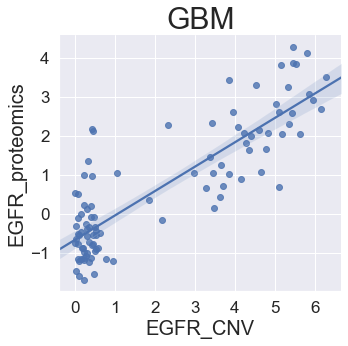

In [7]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", title = "GBM", ra_stats = False ,show_plot = True, save_file_name = "png_files/Step2Cis_Gbm")

In [8]:
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")


Correlation: 0.8512687266142293
P_value:1.235330479008739e-28


# Repeat Steps 1 and 2 for the other 7 cancers

# Kidney 

In [9]:
prot_CNV_Tumor = kidney.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")
prot_CNV_Tumor.columns = prot_CNV_Tumor.columns.droplevel(1) #drop multi-index level

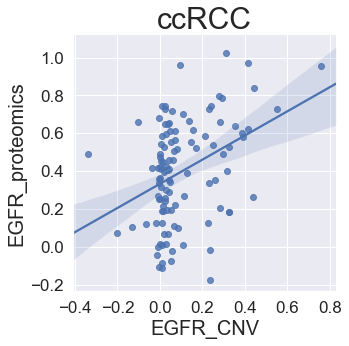

Correlation: 0.3761403530200309
P_value:5.12862395274026e-05


In [10]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue ="none", ra_stats = False, show_plot = True, title = "ccRCC", save_file_name = "png_files/Step2Cis_Kidney")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# Ovarian 

In [11]:
prot_CNV_Tumor = ovar.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")
prot_CNV_Tumor.columns = prot_CNV_Tumor.columns.droplevel(1) #drop multi-index level


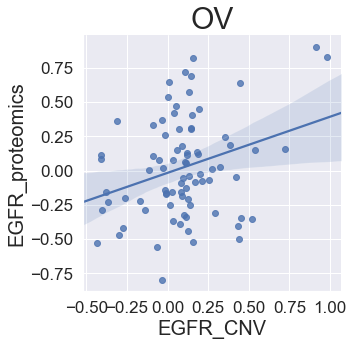

Correlation: 0.3021737315261447
P_value:0.006112209575176951


In [12]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", ra_stats = False,title = "OV", show_plot = True, save_file_name = "png_files/Step2Cis_Ovarian")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# Colon

In [13]:
prot_CNV = colon.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")

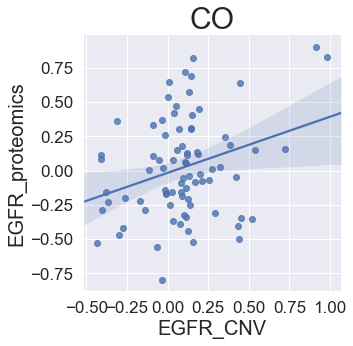

Correlation: 0.3021737315261447
P_value:0.006112209575176951


In [14]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics",hue = "none", ra_stats = False, title = "CO", show_plot = True, save_file_name = "png_files/Step2Cis_Colon")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# Brca 

In [15]:
prot_CNV_Tumor = brca.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")
prot_CNV_Tumor.columns = prot_CNV_Tumor.columns.droplevel(1) #drop multi-index level

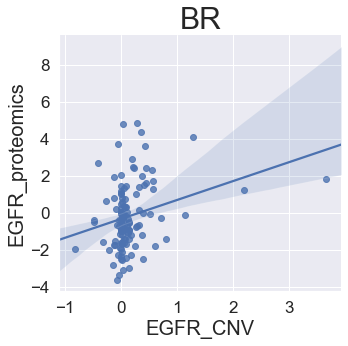

Correlation: 0.2717791141678874
P_value:0.003301432638642013


In [16]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", ra_stats = False, title = "BR", show_plot = True, save_file_name = "png_files/Step2Cis_Brca")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")


# LUAD

In [17]:
prot_CNV_Tumor = luad.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")
prot_CNV_Tumor.columns = prot_CNV_Tumor.columns.droplevel(1) #drop multi-index level

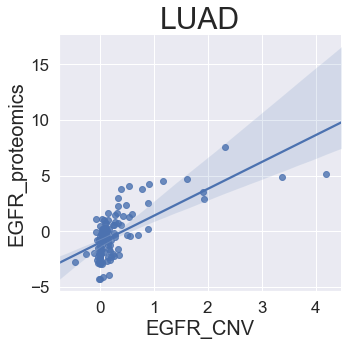

Correlation: 0.6881251124110952
P_value:1.375121355381228e-16


In [18]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = 'none', title = "LUAD", ra_stats = False, show_plot = True, save_file_name = "png_files/Step2Cis_Luad")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# HNSCC

In [19]:
prot_CNV_Tumor = hnscc.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")

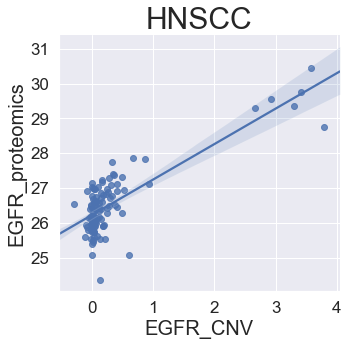

Correlation: 0.807644126618269
P_value:7.850887605030991e-26


In [20]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", title = "HNSCC", ra_stats = False, show_plot = True, save_file_name = "png_files/Step2Cis_Hnscc")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# LSCC

In [21]:
prot_CNV_Tumor = lscc.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")
prot_CNV_Tumor.columns = prot_CNV_Tumor.columns.droplevel(1) #drop multi-index level

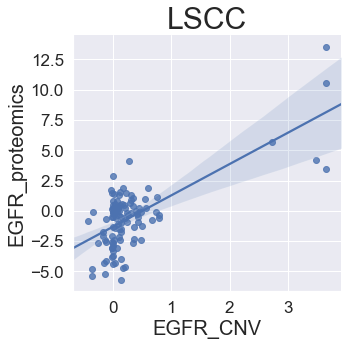

Correlation: 0.6990568515753115
P_value:3.984133514127741e-17


In [22]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", title = "LSCC" , ra_stats = False, show_plot = True, save_file_name = "png_files/Step2Cis_Lscc")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")
